# Sleep project

Goal: to train the classifier to predict the sleep disorder as accurately as possible, given specific features

# EDA

**FEATURE VARIABLES**

In [4]:
import pandas as pd
from pivottablejs import pivot_ui

In [3]:
!pip install pivottablejs

In [6]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
pivot_ui(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [25]:
pivot_ui(df, cols=["Gender"])

C:\Users\Larysa\AppData\Local\Temp\ipykernel_11924\3160324439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

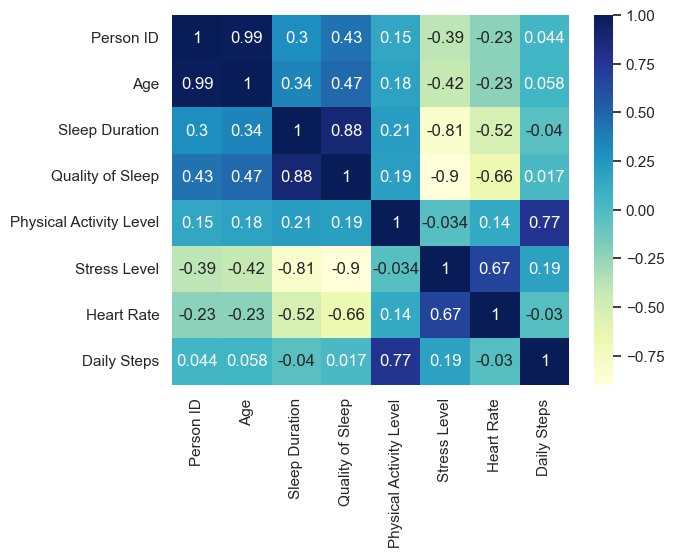

In [30]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

**CORRELATED PAIRS**

* Person ID - Age -> not informative

* Quality of Sleep - Age -> the higher the age, the better quality of sleep

* Stress Level - Age -> the higher the age, the lower stress level

* Sleep Duration - Heart Rate -> the shorter the sleep duration, the higher the heart rate

* Sleep Duration - Stress Level -> the longer the sleep, the lower stress level

* Sleep Duration - Quality of Sleep -> the longer the sleep, the higher its quality

* Quality of Sleep - Heart Rate -> the better sleep quality, the lower heart rate

* Physical Activity - Daily Steps -> makes sense, the higher the physical activity, the more daily steps

* Stress Level - Heart Rate -> also makes sense, the higher the stress level, the higher the heart rate

* Stress level strongly negatively correlated with sleep duration and sleep quality

**TARGET VARIABLE**

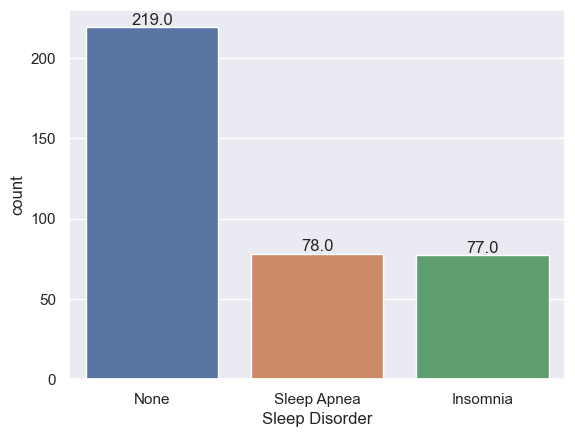

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(x = df["Sleep Disorder"])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

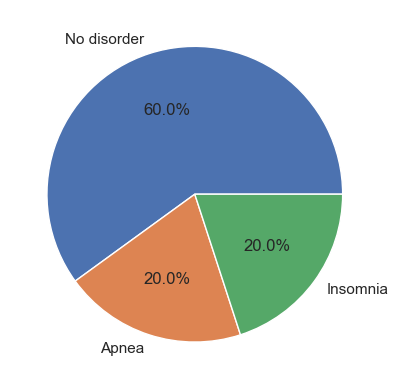

In [31]:
# percentage share

perc_disorder = df["Sleep Disorder"].value_counts(normalize = True).round(1)
mylabels = ["No disorder", "Apnea", "Insomnia"]


plt.pie(perc_disorder, labels = mylabels, autopct='%1.1f%%')
plt.show()

In [21]:
perc_disorder

None           0.6
Sleep Apnea    0.2
Insomnia       0.2
Name: Sleep Disorder, dtype: float64

<Axes: title={'center': 'Sleep Disorder vs BMI'}, xlabel='Sleep Disorder', ylabel='count'>

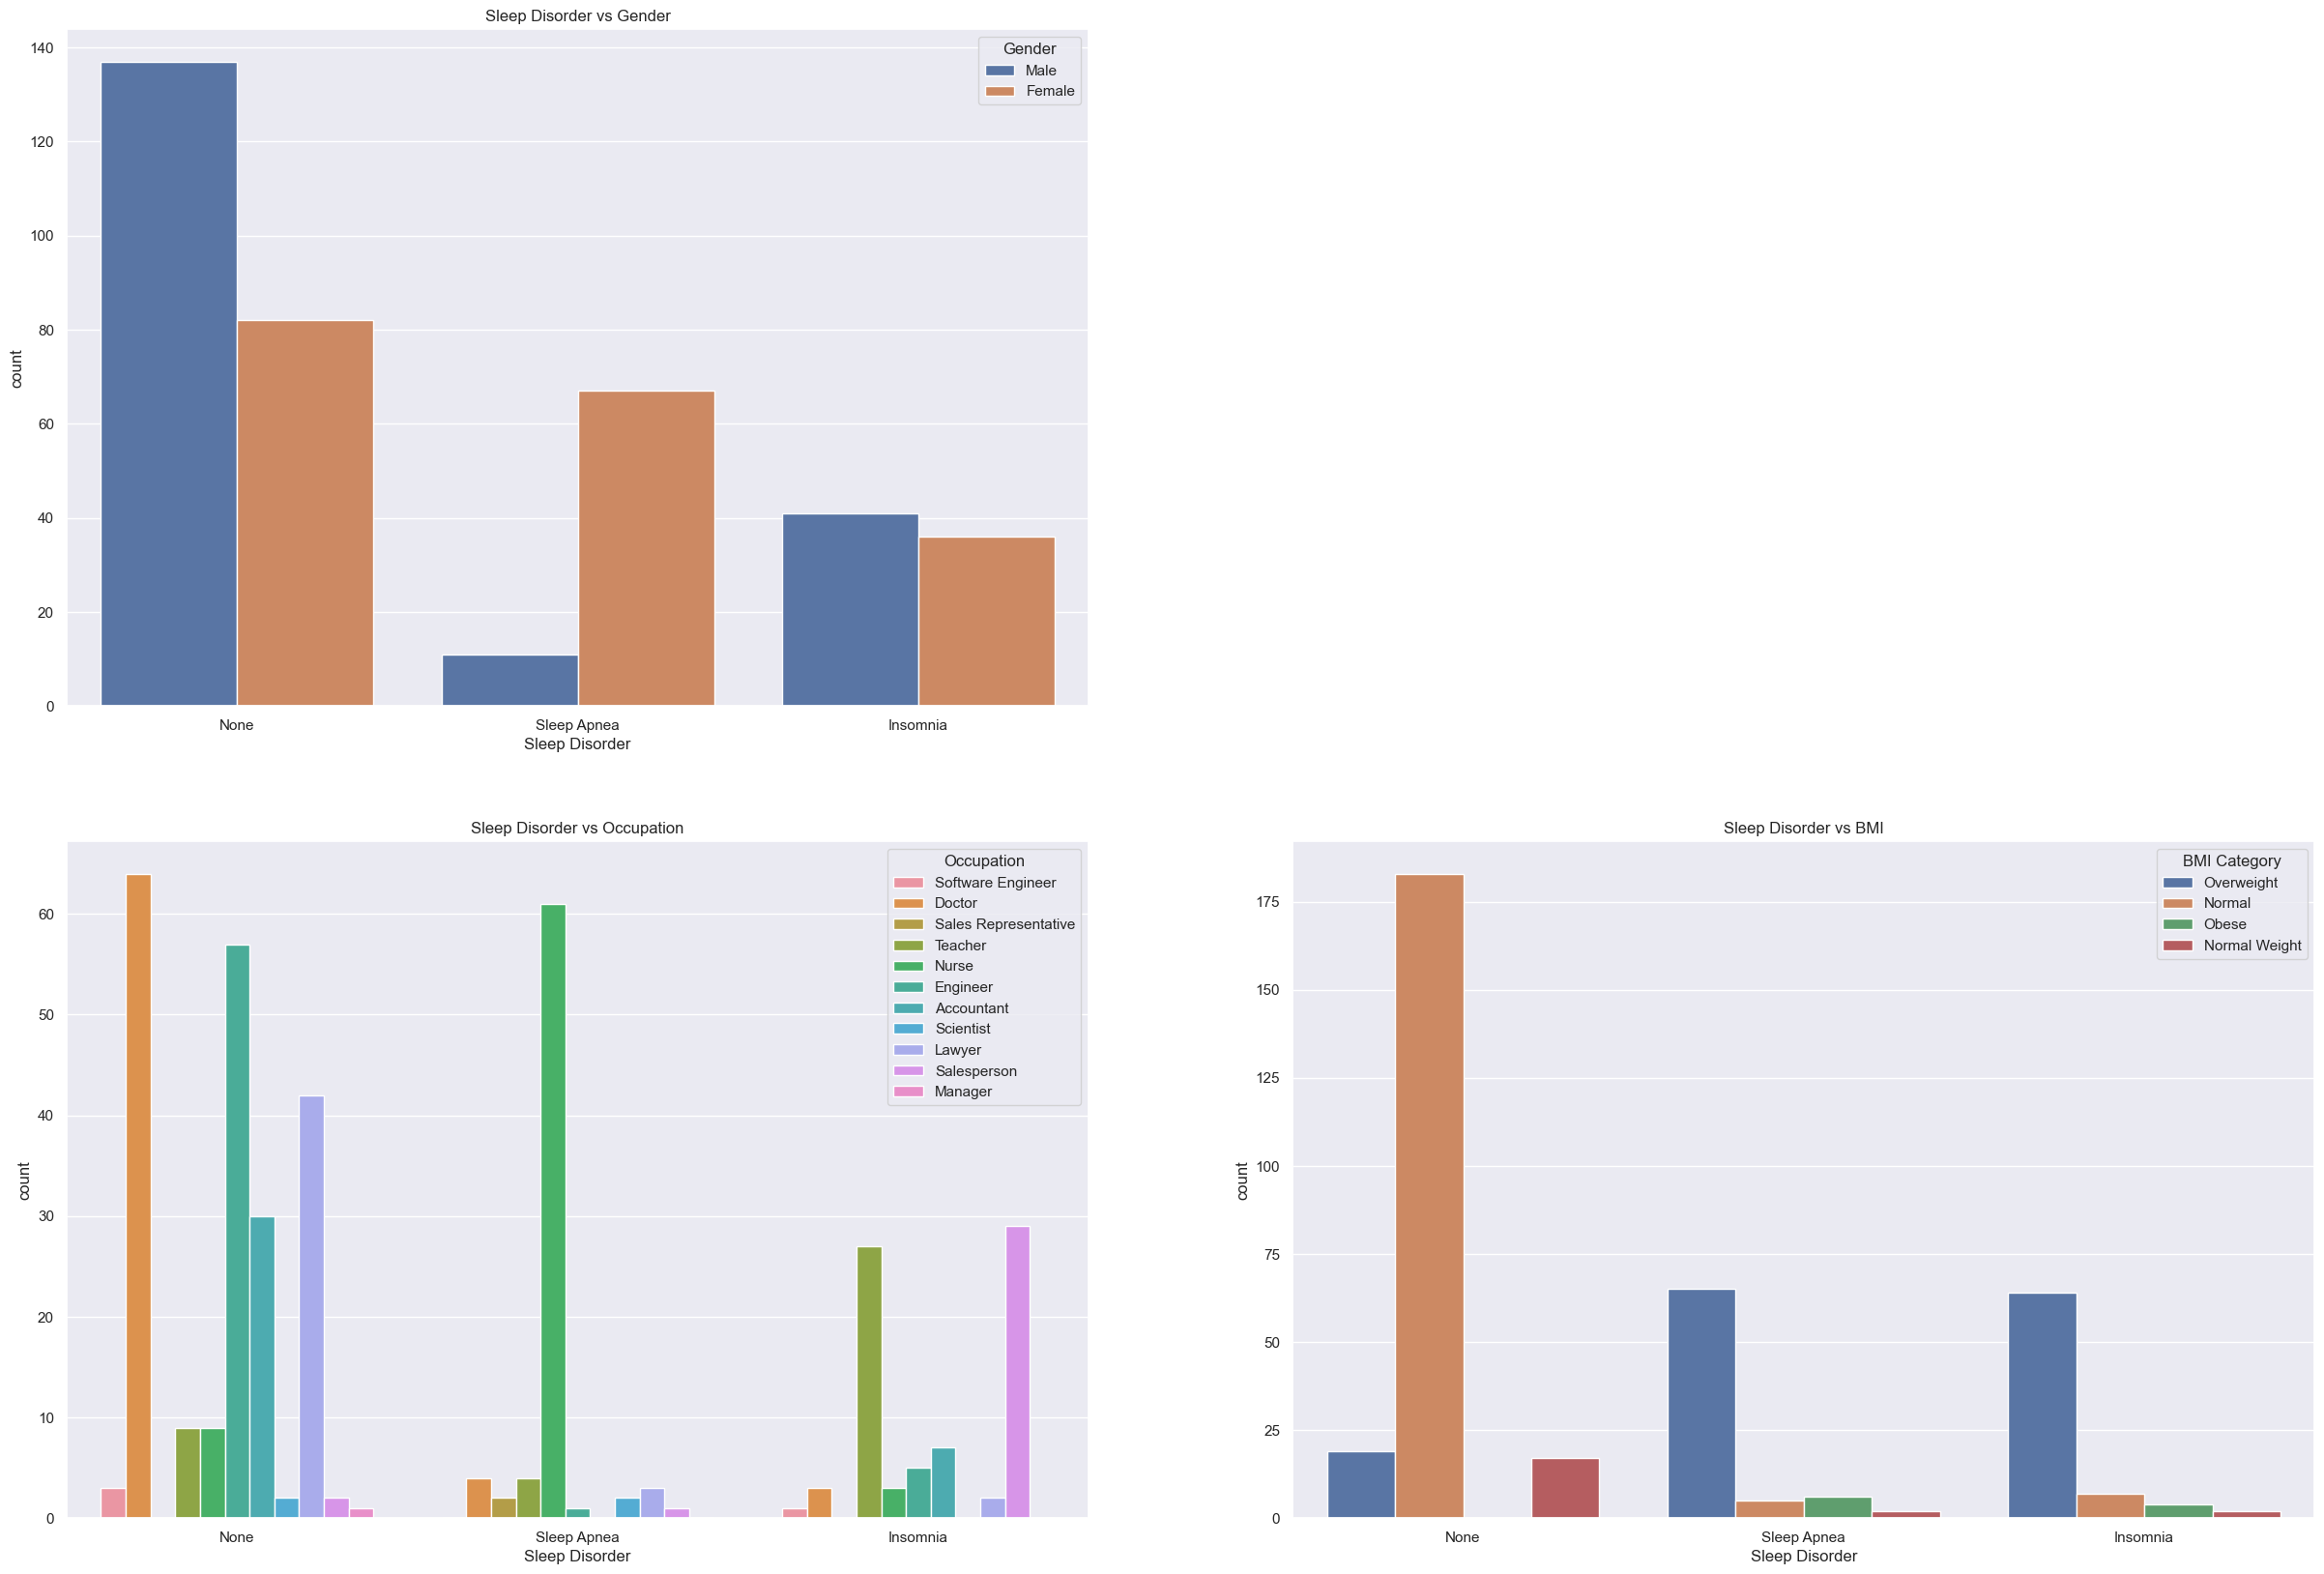

In [44]:
#target variable vs categorical columns

plt.figure(figsize = (30, 20))

plt.subplot(2,2, 1)
plt.gca().set_title('Sleep Disorder vs Gender')
sns.countplot(x = df["Sleep Disorder"], hue = "Gender", data = df)

plt.subplot(2,2,3)
plt.gca().set_title('Sleep Disorder vs Occupation')
sns.countplot(x = df["Sleep Disorder"], hue = "Occupation", data = df)

plt.subplot(2,2,4)
plt.gca().set_title('Sleep Disorder vs BMI')
sns.countplot(x = df["Sleep Disorder"], hue = "BMI Category", data = df)

target variable vs uncategorical columns - age, stress, heart, daily steps, physical activity, quality of sleep, duration of sleep, blood pressure)

<Axes: xlabel='Daily Steps', ylabel='Count'>

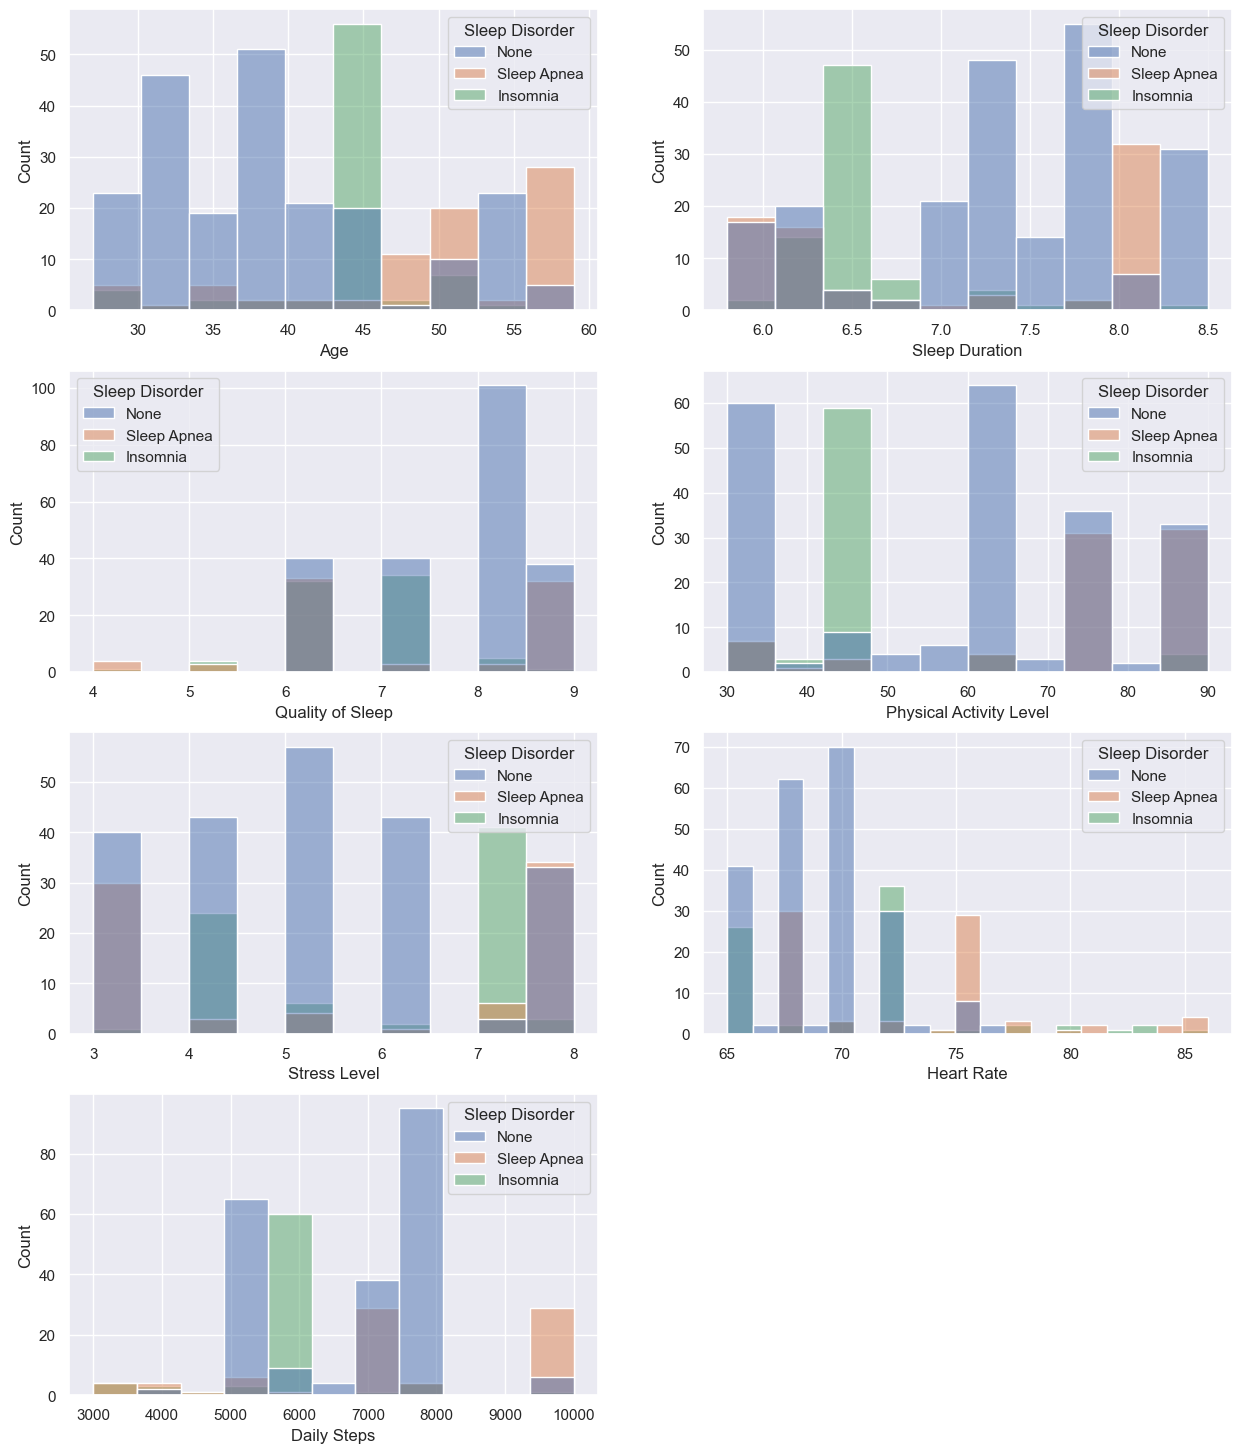

In [49]:
plt.figure(figsize = (15, 18))

plt.subplot(4, 2, 1)
sns.histplot(x = df['Age'], kde = False, hue = df["Sleep Disorder"])

plt.subplot(4, 2, 2)
sns.histplot(x = df['Sleep Duration'], kde = False, hue = df["Sleep Disorder"])

plt.subplot(4, 2, 3)
sns.histplot(x = df['Quality of Sleep'], kde = False, hue = df["Sleep Disorder"])

plt.subplot(4, 2, 4)
sns.histplot(x = df['Physical Activity Level'], kde = False, hue = df["Sleep Disorder"])

plt.subplot(4, 2, 5)
sns.histplot(x = df['Stress Level'], kde = False, hue = df["Sleep Disorder"])

plt.subplot(4, 2, 6)
sns.histplot(x = df['Heart Rate'], kde = False, hue = df["Sleep Disorder"])

plt.subplot(4, 2, 7)
sns.histplot(x = df['Daily Steps'], kde = False, hue = df["Sleep Disorder"])

<Axes: xlabel='Daily Steps'>

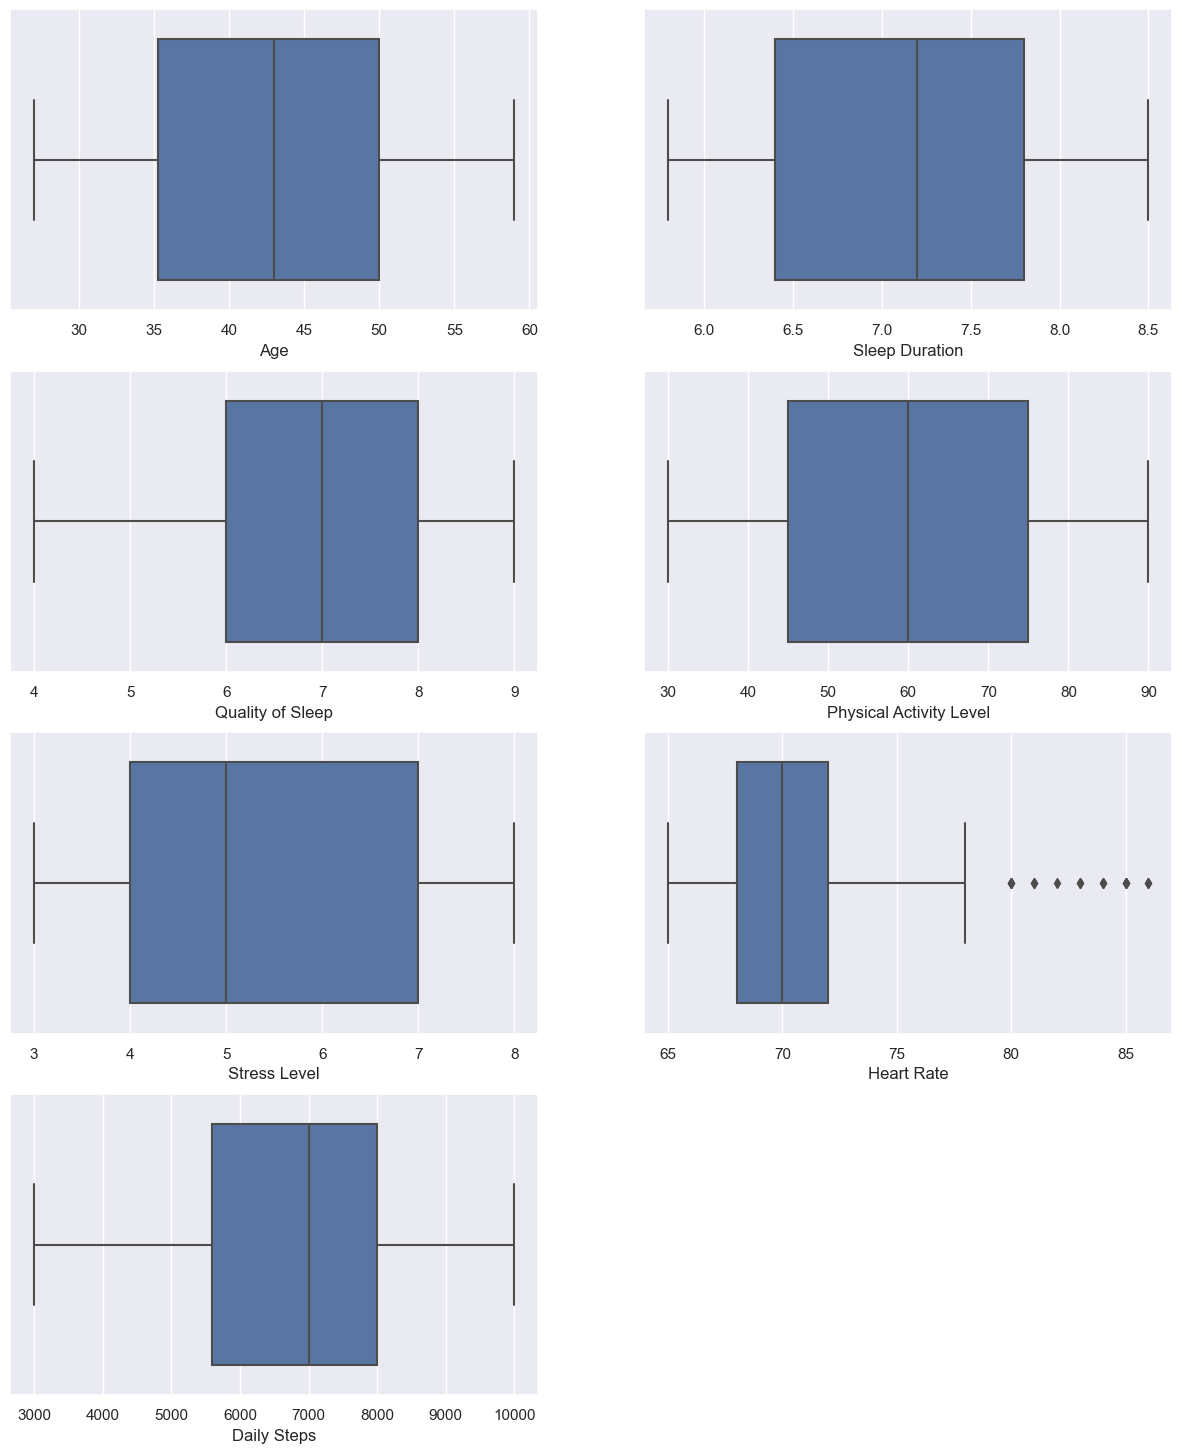

In [56]:
# searching for outliers
# turned out that heart rate has some

plt.figure(figsize = (15, 18))

plt.subplot(4, 2, 1)
sns.boxplot(x = df['Age'])

plt.subplot(4, 2, 2)
sns.boxplot(x = df['Sleep Duration'])

plt.subplot(4, 2, 3)
sns.boxplot(x = df['Quality of Sleep'])

plt.subplot(4, 2, 4)
sns.boxplot(x = df['Physical Activity Level'])

plt.subplot(4, 2, 5)
sns.boxplot(x = df['Stress Level'])

plt.subplot(4, 2, 6)
sns.boxplot(x = df['Heart Rate'])

plt.subplot(4, 2, 7)
sns.boxplot(x = df['Daily Steps'])

<Axes: xlabel='Sleep Disorder', ylabel='Daily Steps'>

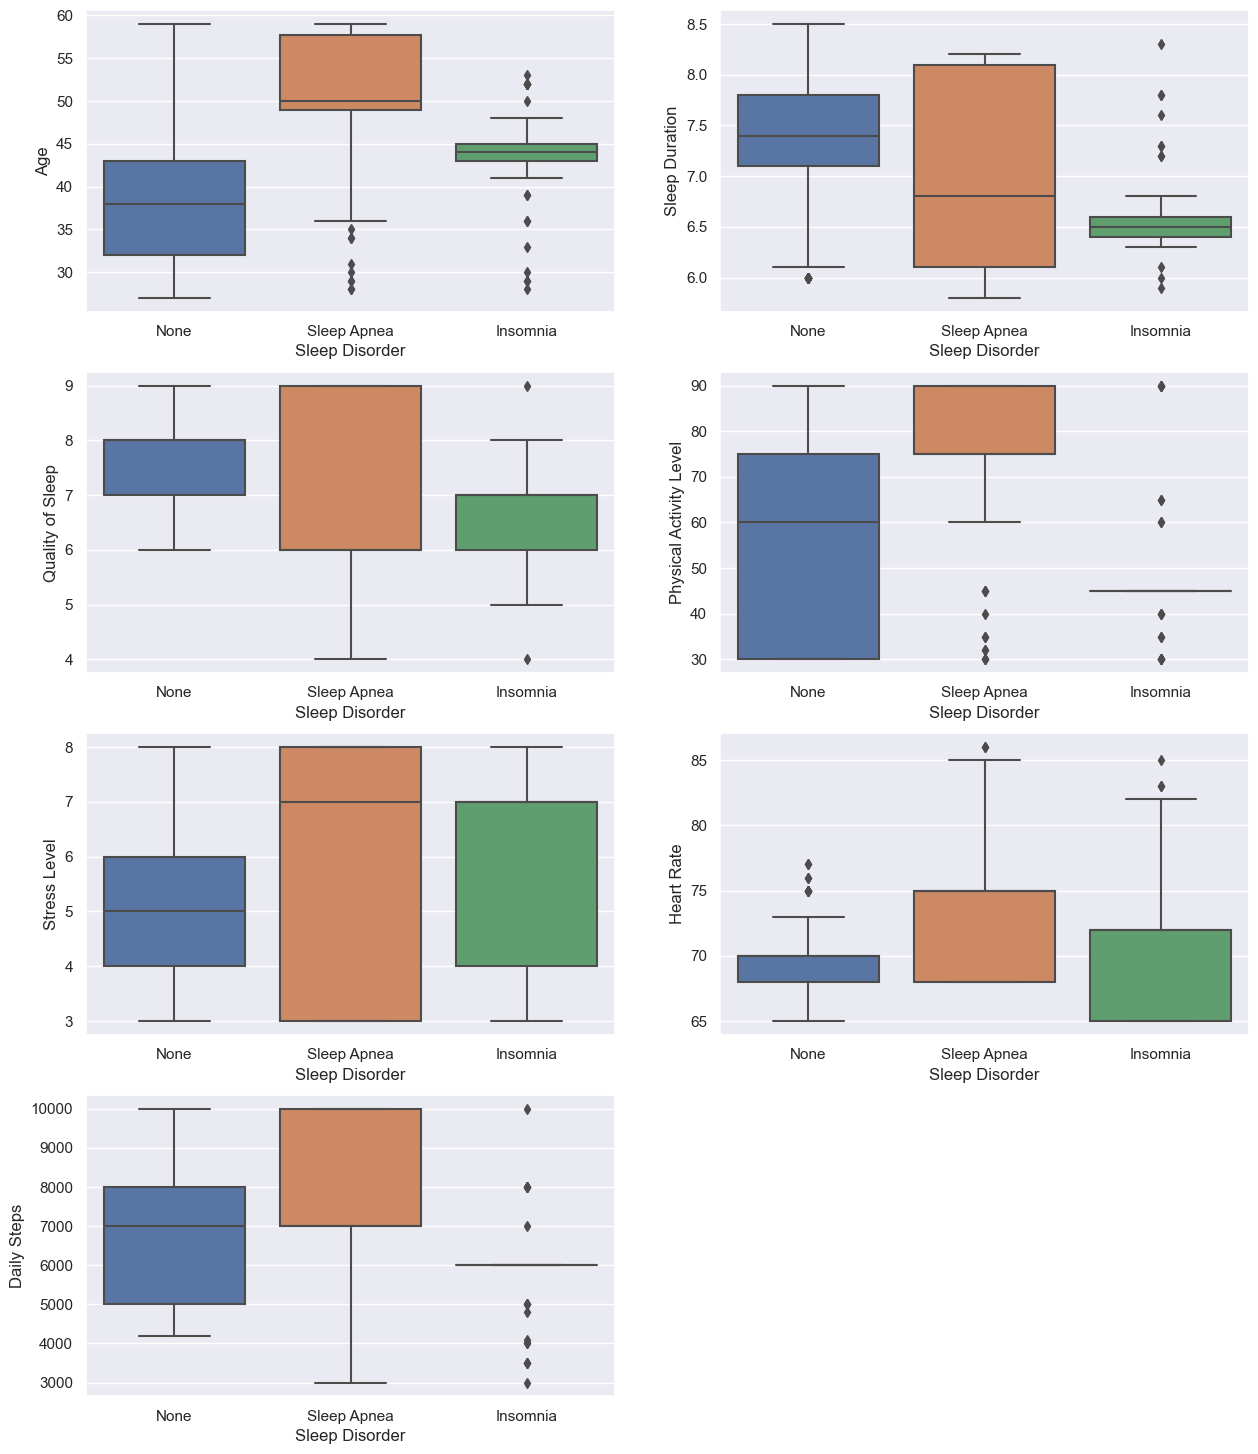

In [57]:
plt.figure(figsize = (15, 18))

plt.subplot(4, 2, 1)
sns.boxplot(x = df["Sleep Disorder"], y = df['Age'])

plt.subplot(4, 2, 2)
sns.boxplot(x = df["Sleep Disorder"] ,y = df['Sleep Duration'])

plt.subplot(4, 2, 3)
sns.boxplot(x = df["Sleep Disorder"], y = df['Quality of Sleep'])

plt.subplot(4, 2, 4)
sns.boxplot(x = df["Sleep Disorder"], y = df['Physical Activity Level'])

plt.subplot(4, 2, 5)
sns.boxplot(x = df["Sleep Disorder"], y = df['Stress Level'])

plt.subplot(4, 2, 6)
sns.boxplot(x = df["Sleep Disorder"], y = df['Heart Rate'])

plt.subplot(4, 2, 7)
sns.boxplot(x = df["Sleep Disorder"], y = df['Daily Steps'])

## CONCLUSIONS

1) Target variable countplot - most people don't have any disorder (60%); number of people suffering from apnea and insomnia is approximately equal (20%)

2) Gender - dataset classes are balanced, however females tend to have sleeping disorder, especially apnea

3) Overweight people suffer from apnea (makes sense) and insomnia

4) Occupation - nurses suffer mostly from apnea (makes sense, because it's been told that women suffer from apnea more than men); sleeping disorder prone professions are salespeople (irregular working hours???), teachers, nurses)

**Histplots**

* sleep disorders start from the age of 45

* long sleep duration generally corresponds to none sleep disorder

* extremely high physical activity level (above 70) means apnea while steps made daily, in contrary, in general decrease the possibility of sleep disorder

* high stress level corresponds to insomnia



# TRAINING I

In [58]:
df_copy = df.copy()
df_copy

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [59]:
df = df.drop('Person ID', axis = 1)
dummies = pd.get_dummies(df[['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']])
df = pd.concat([df, dummies], axis = 1)
df = df.drop(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], axis = 1)
df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Female,Gender_Male,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,27,6.1,6,42,6,77,4200,None,0,1,...,0,0,0,0,0,0,0,0,0,0
1,28,6.2,6,60,8,75,10000,None,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28,6.2,6,60,8,75,10000,None,0,1,...,0,0,0,0,0,0,0,0,0,0
3,28,5.9,4,30,8,85,3000,Sleep Apnea,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,5.9,4,30,8,85,3000,Sleep Apnea,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,Sleep Apnea,1,0,...,0,0,0,0,0,0,0,0,1,0
370,59,8.0,9,75,3,68,7000,Sleep Apnea,1,0,...,0,0,0,0,0,0,0,0,1,0
371,59,8.1,9,75,3,68,7000,Sleep Apnea,1,0,...,0,0,0,0,0,0,0,0,1,0
372,59,8.1,9,75,3,68,7000,Sleep Apnea,1,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
RANDOM_STATE = 50
TEST_SIZE = 0.3

In [61]:
X = df.drop('Sleep Disorder', axis = 1)
X = X.values
y = df['Sleep Disorder']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE, test_size = TEST_SIZE)

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = [MLPClassifier(), LogisticRegression(), DecisionTreeClassifier()]

for m in models:
    y_pred = m.fit(X_train, y_train).predict(X_test)
    acc = accuracy_score(y_test, y_pred).round(2)
    print(f"\n{m}: {acc}")



MLPClassifier(): 0.63

LogisticRegression(): 0.83

DecisionTreeClassifier(): 0.86


C:\Users\Larysa\anaconda_new\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
column_names = list(df.columns.values)
column_names

['Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder',
 'Gender_Female',
 'Gender_Male',
 'Occupation_Accountant',
 'Occupation_Doctor',
 'Occupation_Engineer',
 'Occupation_Lawyer',
 'Occupation_Manager',
 'Occupation_Nurse',
 'Occupation_Sales Representative',
 'Occupation_Salesperson',
 'Occupation_Scientist',
 'Occupation_Software Engineer',
 'Occupation_Teacher',
 'BMI Category_Normal',
 'BMI Category_Normal Weight',
 'BMI Category_Obese',
 'BMI Category_Overweight',
 'Blood Pressure_115/75',
 'Blood Pressure_115/78',
 'Blood Pressure_117/76',
 'Blood Pressure_118/75',
 'Blood Pressure_118/76',
 'Blood Pressure_119/77',
 'Blood Pressure_120/80',
 'Blood Pressure_121/79',
 'Blood Pressure_122/80',
 'Blood Pressure_125/80',
 'Blood Pressure_125/82',
 'Blood Pressure_126/83',
 'Blood Pressure_128/84',
 'Blood Pressure_128/85',
 'Blood Pressure_129/84',
 'Blood Pressure_130/85',
 'Blood Pressure_13

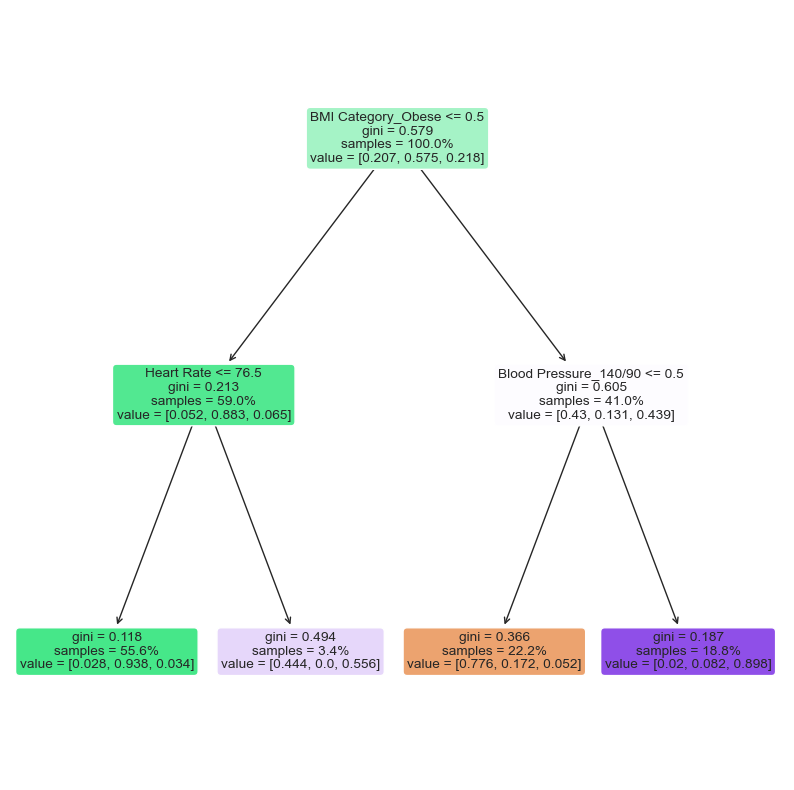

In [80]:
from sklearn.tree import plot_tree


tree_classifier = DecisionTreeClassifier(max_depth=2)
tree_classifier.fit(X_train, y_train)
y_hat = tree_classifier.predict(X_test)

plt.figure(figsize=(10,10))
plot_tree(tree_classifier,
          filled=True,
          feature_names = column_names ,
          proportion=True,
          rounded=True)
plt.show()